# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [170]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [171]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [172]:
#  1. Get the total rides for each city type
rides_city_pyber_data_df = (pd.DataFrame((pyber_data_df.groupby(['type'])).count()['ride_id'])). rename(columns= {"ride_id": "Total Rides"})
rides_city_pyber_data_df



,Total Rides
type,
Rural,125
Suburban,625
Urban,1625


In [173]:
#### 2. Get the total drivers for each city type
drivers_pyber_data_df = (pd.DataFrame(pyber_data_df.groupby(['type']).sum()['driver_count'])). rename(columns= {"driver_count": "Total Drivers"})
rides_city_pyber_data_df

drivers_pyber_data_df 



,Total Drivers
type,
Rural,537
Suburban,8570
Urban,59602


In [174]:
#  3. Get the total amount of fares for each city type
fare_city_pyber_data_df = pd.DataFrame(pyber_data_df.groupby(['type']).sum()['fare'])
fare_city_pyber_data_df = fare_city_pyber_data_df.rename(columns= {"fare": "Total Fares"})
fare_city_pyber_data_df


,Total Fares
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [175]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride_df = (pd.DataFrame(fare_city_pyber_data_df['Total Fares']/rides_city_pyber_data_df['Total Rides']))
average_fare_per_ride_df = average_fare_per_ride_df.rename(columns= {0: "Average Fare per Ride"})
average_fare_per_ride_df

,Average Fare per Ride
type,
Rural,34.623440
Suburban,30.970128
Urban,24.525772


In [176]:
# 5. Get the average fare per driver for each city type. 


average_fare_per_driver_df = (pd.DataFrame(fare_city_pyber_data_df['Total Fares']/drivers_pyber_data_df['Total Drivers'])).rename(columns={0: "Average Fare per Driver"})


average_fare_per_driver_df


,Average Fare per Driver
type,
Rural,8.059460
Suburban,2.258615
Urban,0.668675


In [177]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = rides_city_pyber_data_df.merge(drivers_pyber_data_df, on = "type").merge(fare_city_pyber_data_df, on = "type").merge(average_fare_per_ride_df, on = "type").merge(average_fare_per_driver_df, on = "type")

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [178]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [179]:
#  8. Format the columns.

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("{:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("{:.2f}".format)


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [180]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [181]:
# 1. Read the merged DataFrame

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [214]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.


sum_fare_pyber_data_df = pd.DataFrame(pyber_data_df.groupby(['date','type']).sum()['fare'])

sum_fare_pyber_data_df


,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [227]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_fare_pyber_data_df = sum_fare_pyber_data_df.reset_index()

sum_fare_pyber_data_df


,level_0,index,date,type,fare
0,0,0,2019-01-01 00:08:16,Urban,37.91
1,1,1,2019-01-01 00:46:46,Suburban,47.74
2,2,2,2019-01-01 02:07:24,Suburban,24.07
3,3,3,2019-01-01 03:46:50,Urban,7.57
4,4,4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...,...,...
2370,2370,2370,2019-05-08 04:20:00,Urban,21.99
2371,2371,2371,2019-05-08 04:39:49,Urban,18.45
2372,2372,2372,2019-05-08 07:29:01,Urban,18.55
2373,2373,2373,2019-05-08 11:38:35,Urban,19.77


In [250]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pivot_sum_fare_pyber_data_df = sum_fare_pyber_data_df.pivot(index = "date", columns = "type", values = "fare")

pivot_sum_fare_pyber_data_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [254]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

jan_may_fare_pyber_data_df = pivot_sum_fare_pyber_data_df.loc[(pivot_sum_fare_pyber_data_df.index >= "2019-01-01") & (pivot_sum_fare_pyber_data_df.index <= "2019-04-01")]

jan_may_fare_pyber_data_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-03-31 11:49:06,NaN,NaN,24.16
2019-03-31 13:58:15,NaN,NaN,29.41
2019-03-31 14:58:15,NaN,NaN,7.67


In [260]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

jan_may_fare_pyber_data_df.index = pd.to_datetime(jan_may_fare_pyber_data_df.index)



In [258]:
# 7. Check that the datatype for the index is datetime using df.info()

jan_may_fare_pyber_data_df.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1652 entries, 2019-01-01 00:08:16 to 2019-03-31 17:01:37
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     79 non-null     float64
 1   Suburban  433 non-null    float64
 2   Urban     1140 non-null   float64
dtypes: float64(3)
memory usage: 51.6 KB


In [262]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

jan_may_fare_pyber_data_df = jan_may_fare_pyber_data_df.resample('W').sum()



type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


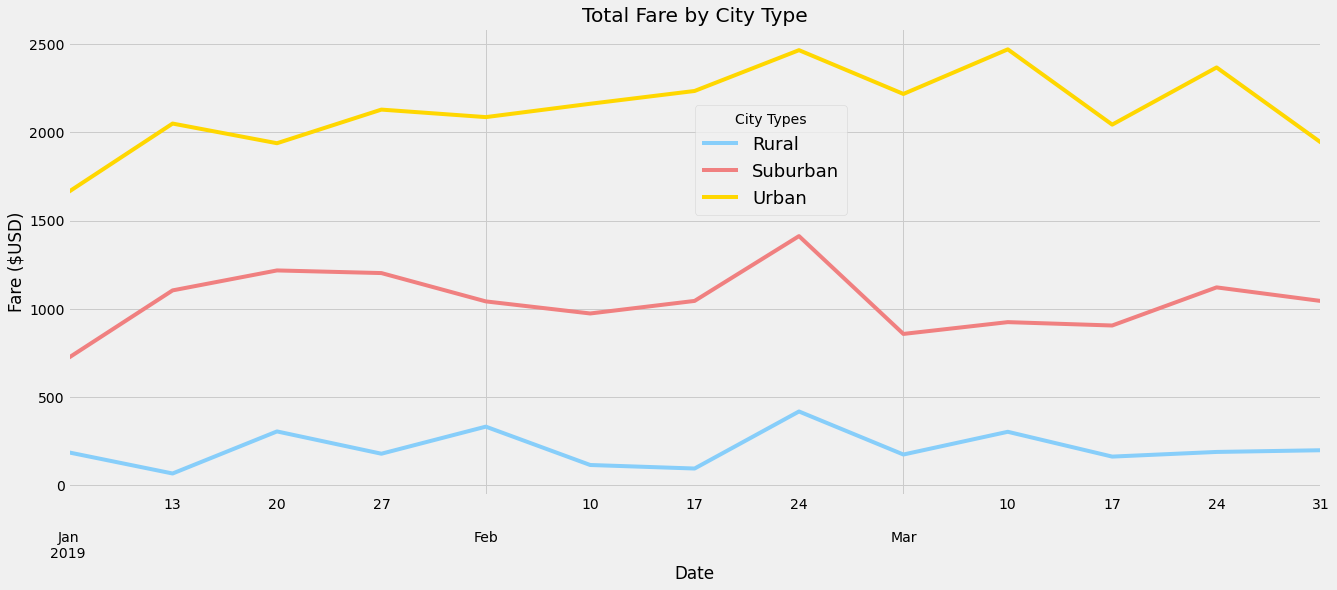

In [283]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(20,8))
jan_may_fare_pyber_data_df.plot(kind="line", ax=ax, color=["lightskyblue", "lightcoral", "gold"])
ax.set_title("Total Fare by City Type")
ax.set_xlabel("Date")
ax.set_ylabel("Fare ($USD)")
lgnd = plt.legend(fontsize="18", loc=(0.5,0.6), title="City Types")


plt.savefig("analysis/PyBer_fare_summary.png")
